In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

In [8]:
cmap_bold = ListedColormap (["#FF0000", "0000FF"])
cmap_light = ListedColormap(["FFBBB","#BBBBFF"])

**Useful Functions**

In [9]:
def ReLU(H):
  return H*(H>0)

def softmax(H):
  eH = np.exp(H)
  return eH/eH.sum(axis=1, keepdims = True)

def cross_entropy(Y, P_hat):
  return -np.sum(Y*np.log(P_hat))

def one_hot_encode(y):
  N = len(y)
  K = len(set(y))
  Y = np.zeros((N,K))

  for i in range (N):
    Y[i, y[i]]=1
  return Y

def accuracy (y, y_hat):
  return np.mean (y==y_hat)

In [10]:
class ANN():

  def fit(self,X,y, neurons=10, eta=4e-3, epochs =4e3, show_curve=False):
    epochs=int(epochs)
    Y= one_hot_encode(y)
    N,D=X.shape

    K=Y.shape[1]

    #Initialize Weights and Biases

    self.W = {l: np.random.randn(M[0],M[1]) for l , M in enumerate(zip([D,neurons], [neurons, K]),1)}
    self.b = {l: np.random.randn(M) for l , M in enumerate([neurons, K],1)}

    self.a = {1: np.tanh, 2:softmax}

    J= np.zeros(epochs)

    for epoch in range(epochs):
      self.__forward__(X)
      P_hat = self.Z[2]
      J[epoch] = cross_entropy(Y, P_hat)

      self.W[2] -= eta*(1/N)*self.Z[1].T@(P_hat-Y)
      self.b[2] -= eta*(1/N)*(P_hat-Y).sum(axis=0)

      self.W[1] -= eta*(1/N)*X.T@((P_hat-Y)@self.W[2].T*(1-self.Z[1]**2))
      self.b[1] -= eta*(1/N)*((P_hat-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis = 0)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.show()

  def __forward__(self, X):
    self.Z ={0:X}

    for l in sorted(self.W.keys()):
      self.Z[l]=self.a[l](self.Z[l-1]@self.W[l]+self.b[l])
  
  def predict(self, X):
    self.__forward__(X)
    return self.Z[2].argmax(axis=1)



In [11]:
{str(i): j for i,j in zip(range (4), range(10,14))}

{'0': 10, '1': 11, '2': 12, '3': 13}

In [12]:
data = pd.read_csv('https://raw.githubusercontent.com/DavidGlezGmz/Neural-Networks/main/TripGaussKNN.csv')
data

,Unnamed: 0,0,1,2
0,0,2.769395,0.762216,0
1,1,1.519271,1.487948,0
2,2,2.407084,2.836605,0
3,3,1.276534,1.396749,0
4,4,0.380165,4.396517,0
...,...,...,...,...
2995,2995,-3.537007,3.431588,2
2996,2996,-1.709969,2.675040,2
2997,2997,-2.098664,2.084230,2
2998,2998,-1.523310,1.083698,2


In [13]:
y = data['2'].to_numpy()

In [14]:
X = data[['0', '1']].to_numpy()

In [15]:
print (X)
print (X.shape)

[[ 2.76939496  0.76221573]
 [ 1.51927052  1.48794784]
 [ 2.40708363  2.83660528]
 ...
 [-2.09866389  2.08423019]
 [-1.52330999  1.08369811]
 [-2.87191052  0.3439586 ]]
(3000, 2)


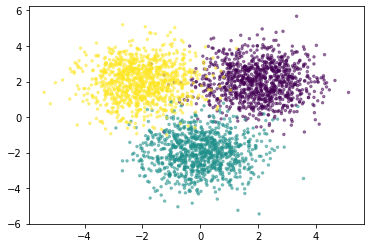

In [16]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, s=6)

In [17]:
myANN = ANN()

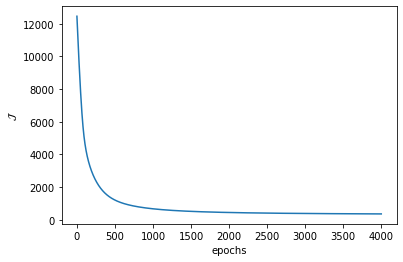

In [18]:
myANN.fit(X,y, show_curve=True)

In [19]:
y_hat=myANN.predict(X)

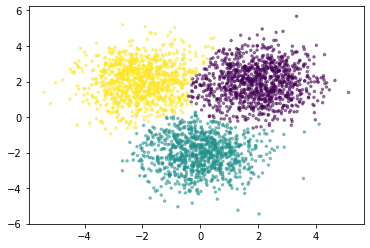

In [20]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y_hat, alpha=0.5, s=6)

In [21]:
accuracy(y,y_hat)

0.9646666666666667